# 写在最前面

> 聊聊什么是计算机科学
- order: 2

## 计算机科学
随着人工智能技术的不断发展，计算机科学已经成为当今世界发展最快的学科领域之一。那么当我们讨论计算机科学的时候，我们到底在说什么呢？

你可能会问:"计算机科学,不就是整天对着电脑敲代码吗?"噢,那你就大错特错了!计算机科学就像是现代版的炼金术 - 我们用简单的0和1,创造出改变世界的魔法。它是艺术家的画笔,用代码勾勒出虚拟世界的轮廓;它是建筑师的图纸,搭建起互联网的摩天大楼;它更是魔术师的魔杖,让人工智能从科幻电影走进现实生活。

在这个领域里,你可能早上在思考如何让计算机理解人类的语言,下午在设计一个能自动写诗的程序,晚上又在研究如何让自动驾驶汽车做出更安全的决策。每一行代码都可能是一次探索,每个算法都可能成为一次突破。

如果说数学是自然界的语言,那么编程就是数字时代的魔法咒语。

本质上说计算机科学就是将现实世界的问题数字化并通过编程来解决问题，而一个个数字化问题可以抽象为 __输入-算法-输出__ 来表示(如下图)


```{mermaid}
flowchart LR
  输入 --> 算法 --> 输出
```

 其中输入输出为现实中的事物在计算机中的数字化表示，算法就是通过一系列逻辑步骤将输入转化为输出完成一定的需求。我们先说说在计算机中输入输出的数据是怎么保存的吧。

## 数字的二进制表示
我们很早就知道所有信息在计算机中都是通过`0`和`1`来表示，因此在计算机的世界就是一个二进制的世界。首先看一下在计算机里，数字是怎么表示的。在实际生活中我们遇到的数字都是十进制的，它的基数是10，这意味着每当数字达到10时，就会向前一位进位。而在计算机眼里一切数字都应该是二进制的，它的基数变成了`2`,每当数字达到2就要向前进一位。那我们如何将一个实际生活中的数字转化成一个计算机世界的数字呢？

In [1]:
def decimal_to_binary(decimal_num):
    if decimal_num == 0:
        return "0"
    
    binary = ""
    while decimal_num > 0:
        binary = str(decimal_num % 2) + binary
        decimal_num //= 2
    
    return binary

以上是一个简单的`python`小程序将一个十进制数字转化为一个二进制数。

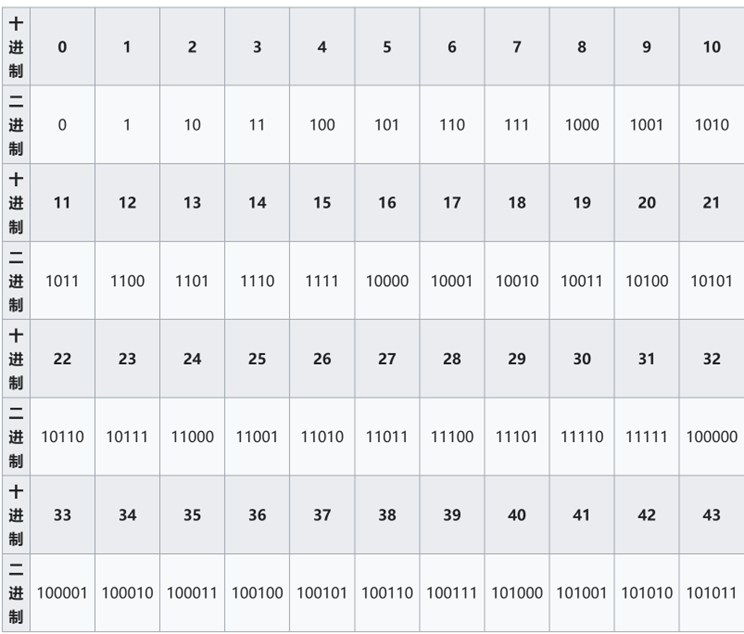

根据以上表格，我们测试一下我们写的这个小函数的功能，将一个十进制数转化为二进制数的表示。

In [2]:
number = 35
binary_representation = decimal_to_binary(number)
print(f"{number}转化为二进制表示是: {binary_representation}")

35转化为二进制表示是: 100011


Hooray！这里我们成功的将一个现实中的数字转化为一个二进制数了！

## 英文字母的表示方法 -- ASCII码
好了，有了数字，那么常见的英文字母呢？
我们可不可以通过某种数字编码来表示，给每一个字母用一个独特的数字来代表呢?当然可以！人们发明了[ASCII码](https://simple.wikipedia.org/wiki/ASCII)来表示不同的英文字母，就是常说的编码方式将字母转化为数字，最终通过二进制来表示出来。在Python中，我们可以通过`ord`函数来得到某个字母的ASCII值。

In [3]:
ascii_number = ord('A')
print(f"A的ASCII码是:{ascii_number}")

A的ASCII码是:65


In [4]:
binary_ascii = decimal_to_binary(ascii_number)
print(f"A在计算机的二进制表示是：{binary_ascii}")

A在计算机的二进制表示是：1000001


从上面的例子中可以看到字母A的ASCII码是65,转化为二进制的 1000001。

```{mermaid}
flowchart LR
  A --> 65 --> 1000001
```

## Unicode码
除了英文以外，其他国家的语言又是如何表示呢？人们又发明了[Unicode码](https://home.unicode.org/about-unicode/)--一种16进制编码系统来表示国际语言。首先我们来看看中文是怎么表示的吧。

In [5]:
unicode_number = hex(ord('中'))
print(f'中的unicode码是: {unicode_number}')

中的unicode码是: 0x4e2d


已知一个Unicode值，我们如何展示对应的符号呢？下面这个python函数实现了这个功能。

In [6]:
def unicode_string_to_char(unicode_string):
    unicode_value = int(unicode_string.replace('0x', ''), 16)
    return chr(unicode_value)

除了国际语言，表情符号也是用Unicode码表示

In [7]:
emoji_unicode = hex(ord('😂'))
print(f'😂的unicode码是：{emoji_unicode}')

😂的unicode码是：0x1f602


In [8]:
unicode_string_to_char('0x1f602')

'😂'

这里我们打印了😂这个今年最流行的表情图标以及对应的Unicode

## 图像
我们上网浏览时候的照片，都是由一个个的像素组成的，每一个像素就是一个点，并且由一个或者多个数字表示其性质（颜色）

下面这个例子，我们输出一个200 * 200大小的棋盘

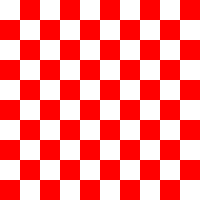

In [9]:
from PIL import Image
import numpy as np

# 打印一个棋盘
width, height = 200, 200
image = Image.new('RGB', (width, height))
pixels = image.load()

square_size = 20
for x in range(width):
    for y in range(height):
        is_odd_square = ((x // square_size) + (y // square_size)) % 2
        if is_odd_square:
            pixels[x, y] = (255, 0, 0)  # Red square
        else:
            pixels[x, y] = (255, 255, 255)  # White square

display(image)

我们可以将 30 * 30 像素的区域的颜色打印出来，其中`W`代表白色，

In [10]:
print("30x30区域的像素值:")
for y in range(30):
    for x in range(30):
        print('R' if pixels[x,y] == (255,0,0) else 'W', end=' ')
    print()

30x30区域的像素值:
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W W W W W W W W W W W W W W W R R R R R R R R R R 
W W W W W W

## RGB 值
[RGB(红蓝绿)](https://rgbcolor.bchrt.com/)是一个用于表示颜色的模型，它将颜色表示为三个基本分量（或通道）的混合，即：红色、绿色和蓝色。 该模型使用三个数字（通常在0.0 到1.0 之间，或在0 到255 之间）来描述颜色，各数字代表了决定最终颜色的三种基本颜色的不同强度（或贡献）范围是0到255.

In [11]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def create_color_square(rgb_value, size=100):
    img = Image.new('RGB', (size, size), color=rgb_value)
    return img

def display_colors(colors):
    fig, axs = plt.subplots(1, len(colors), figsize=(len(colors)*2, 2))
    
    for i, color in enumerate(colors):
        img = create_color_square(color)
        if len(colors) > 1:
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(f'RGB {color}')
        else:
            axs.imshow(img)
            axs.axis('off')
            axs.set_title(f'RGB {color}')
    
    plt.tight_layout()
    plt.show()

上面这两个函数采用RGB模型来表示不同的颜色

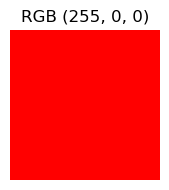

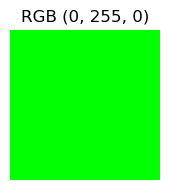

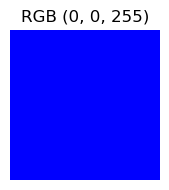

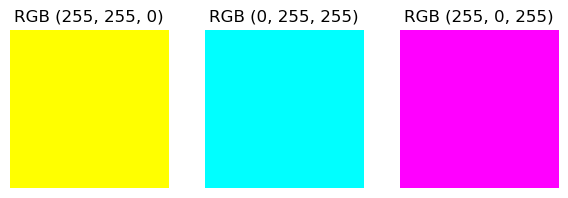

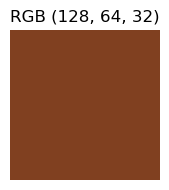

In [12]:
red = (255, 0, 0)
green = (0, 255, 0)
blue = (0, 0, 255)
yellow = (255, 255, 0)
cyan = (0, 255, 255)
magenta = (255, 0, 255)
    
display_colors([red])
display_colors([green])
display_colors([blue])
    
display_colors([yellow, cyan, magenta])
    
custom_color = (128, 64, 32)
display_colors([custom_color])

从上面的例子中可以看到RGB模型来显示不同的颜色。

## 算法
我们介绍了各种不同的数据在计算机中的保存形式，接下来我们要介绍一下算法，作为编程的核心逻辑思想。

In [13]:
def bubble_sort(arr):
    n = len(arr)
    
    for i in range(n):
        # 判断是否更改过数字顺序
        swapped = False
        
        # 保持最后i个元素的位置
        for j in range(0, n-i-1):
            # 遍历数组从 0 to n-i-1
            # 如果当前元素大于下一个元素交换
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        
        # 如果没有数字交换过顺序退出
        if not swapped:
            break
    
    return arr

In [14]:
numbers =  [64, 34, 25, 12, 22, 11, 90]

In [15]:
print("使用冒泡排序：")
numbers_copy1 = numbers.copy()  
sorted_numbers1 = bubble_sort(numbers_copy1)
print(sorted_numbers1)

使用冒泡排序：
[11, 12, 22, 25, 34, 64, 90]


这个例子很好地展示了什么是算法：

* 输入：都是同一个无序的数字列表 [64, 34, 25, 12, 22, 11, 90]
* 过程：`bubble_sort` 使用了冒泡排序算法，通过不断比较和交换相邻元素来排序
* 输出：都得到了相同的有序列表

我们可以通过一个更直观的例子来看排序过程：

In [16]:
def visualize_sort(numbers):
    """
    用简单的可视化方式展示数字大小
    """
    for num in numbers:
        # 用星号表示数字的大小
        print('*' * num)

print("排序前的数据可视化：")
visualize_sort(numbers)

print("\n排序后的数据可视化：")
visualize_sort(bubble_sort(numbers))

排序前的数据可视化：
****************************************************************
**********************************
*************************
************
**********************
***********
******************************************************************************************

排序后的数据可视化：
***********
************
**********************
*************************
**********************************
****************************************************************
******************************************************************************************
